# Data Imputation and Missing Values in Pandas - Lesson 7 (26/03/2025)

In statistics, *imputation* is the process of replacing missing data with substituted values. 

![title](imgs/cover.png)


Missing values is one of the most common problems that you will come across when performing data analysis. Furthermore, machine learning models require that a dataset does not contain any missing values before they can be fitted to the data. Therefore, it is crucial that we learn how to properly handle them.

There are mainly two ways that we can deal with missing values in a dataset:

1. If there are only a few rows with missing values or if a column has an overwhelming number of missing values, we can simply drop them from the dataset without running into the risk of losing too much information. 
2. An alternative approach to handling missing values is via imputation. Imputation is the process whereby the missing values in a dataset are replaced with some substituted values. 

For the purpose of this lecture, we will examine the process of imputation and more specifically, we will learn the difference between a univariate approach to imputing versus a multivariate approach to imputing. Working both on tabular data and time-series data.



**Topics:**
  * Missing values and Imputation
  * Tabular data
  * Time-series 



### We can identify four cases:

#### Tabular data:
- Univariate 
- Multivariate

#### Time-series data:
- Univariate 
- Multivariate

## Let's start 

The following line imports *pandas* and prints the version:

In [2]:
import pandas as pd
import numpy as np
pd.__version__

'1.5.3'

Let's download back our Titanic dataset:

In [3]:
titanic = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv")

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Univariate vs Multivariate Tabular Data 

Univariate imputation implies that we are only considering the values of a single column when performing imputation. Multivariate imputation, on the other hand, involves taking into account other features in the dataset when performing imputation.

The multivariate approach to imputing is generally preferred over the univariate approach as it is more robust and provides our model with a more accurate representation of the missing values in order to make better predictions.

In this tutorial, we will explore 3 different imputation techniques with reference to the [Titanic dataset](https://www.kaggle.com/c/titanic/data).


### Univariate Tabular data
First, let's focus on the **univariate** case and assume we have only received the passengers' ages from the Titanic dataset.

In [5]:
age_dfs = titanic[["Age"]].copy()
age_dfs.head(10)

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


In [6]:
## count NaN values
print("Len of age_dfs: ", len(age_dfs))
print("Count of NaN values: ", age_dfs["Age"].isnull().sum())

Len of age_dfs:  891
Count of NaN values:  177


In [7]:
## A simple approach to fill NaN values is to fill them with the mean of the column
mean_age = age_dfs["Age"].mean()
age_dfs["age_f"] = age_dfs["Age"].fillna(mean_age)

print("Count of NaN values after filling: ", age_dfs["age_f"].isnull().sum())

Count of NaN values after filling:  0


In [8]:
age_dfs.describe()

,Age,age_f
count,714.000000,891.000000
mean,29.699118,29.699118
std,14.526497,13.002015
min,0.420000,0.420000
25%,20.125000,22.000000
50%,28.000000,29.699118
75%,38.000000,35.000000
max,80.000000,80.000000


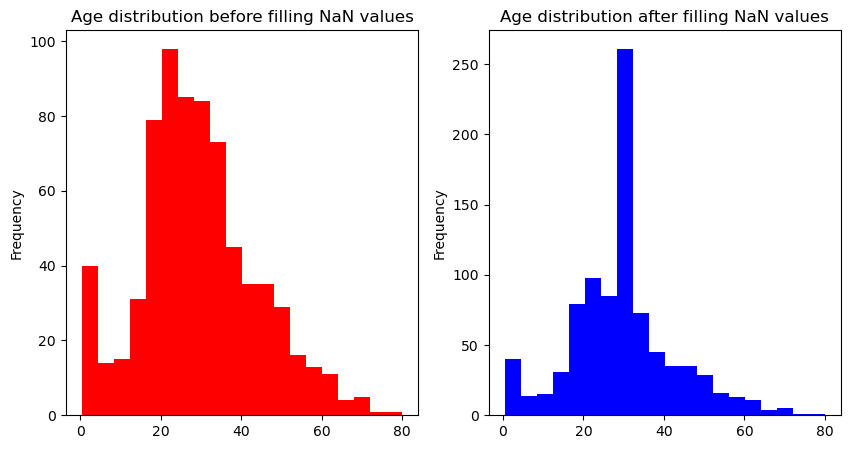

In [9]:
## Let's display the distribution of the age values before and after filling the NaN values
import matplotlib.pyplot as plt
axs = plt.subplots(1, 2, figsize=(10, 5))

age_dfs["Age"].plot.hist(ax=axs[1][0], bins=20, color="red", title="Age distribution before filling NaN values")
age_dfs["age_f"].plot.hist(ax=axs[1][1], bins=20, color="blue", title="Age distribution after filling NaN values")
plt.show()

In [10]:
## Let's see a more extreme case 

In [11]:
example_age_df = {"Age" : [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 
                           ## Now nan values 
                           np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 
                           ## then jump to very high ages
                            70, 71, 72, 73, 74, 70, 71, 72, 73, 74, 70, 71, 72, 73, 74, 70, 71, 72, 73, 74, 70, 71, 72, 73, 74, 70, 71, 72, 73, 74,
                           ]}

In [12]:
example_age_df = pd.DataFrame(example_age_df)
## fill Age with mean 
mean_age = example_age_df["Age"].mean()
example_age_df["Age_f"] = example_age_df["Age"].fillna(mean_age)



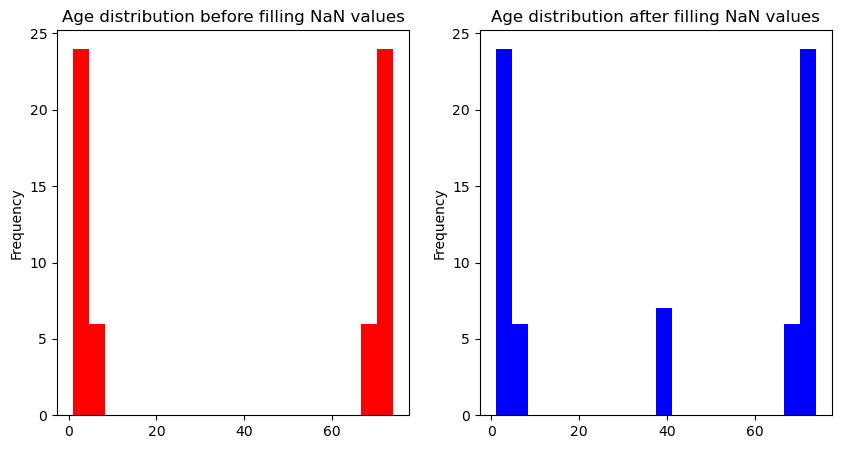

In [13]:
## Let's display the distribution of the age values before and after filling the NaN values
import matplotlib.pyplot as plt
axs = plt.subplots(1, 2, figsize=(10, 5))

example_age_df["Age"].plot.hist(ax=axs[1][0], bins=20, color="red", title="Age distribution before filling NaN values")
example_age_df["Age_f"].plot.hist(ax=axs[1][1], bins=20, color="blue", title="Age distribution after filling NaN values")
plt.show()

## Solutions on tabular data? 

Replace missing values using a descriptive statistic:
- mean
- median
- most frequent
- a constant value

Or even sample *randomly* the values, to better maintain the input data-distribution.

And we can use a "Univariate imputer" from sklearn for completing missing values with simple strategies.

- [Simple imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)


In [14]:
from sklearn.impute import SimpleImputer

In [15]:
example_age_df = example_age_df[["Age"]].copy()
print("Missing values before imputation: ", example_age_df["Age"].isnull().sum())

Missing values before imputation:  7


In [16]:
strategy = "most_frequent"
simple_imp = SimpleImputer(missing_values = np.nan, strategy = strategy)

example_age_df["Age_f"] = simple_imp.fit_transform(example_age_df["Age"].values.reshape(-1, 1))
example_age_df.iloc[30:40]


,Age,Age_f
30,NaN,1.0
31,NaN,1.0
32,NaN,1.0
33,NaN,1.0
34,NaN,1.0
35,NaN,1.0
36,NaN,1.0
37,70.0,70.0
38,71.0,71.0
39,72.0,72.0


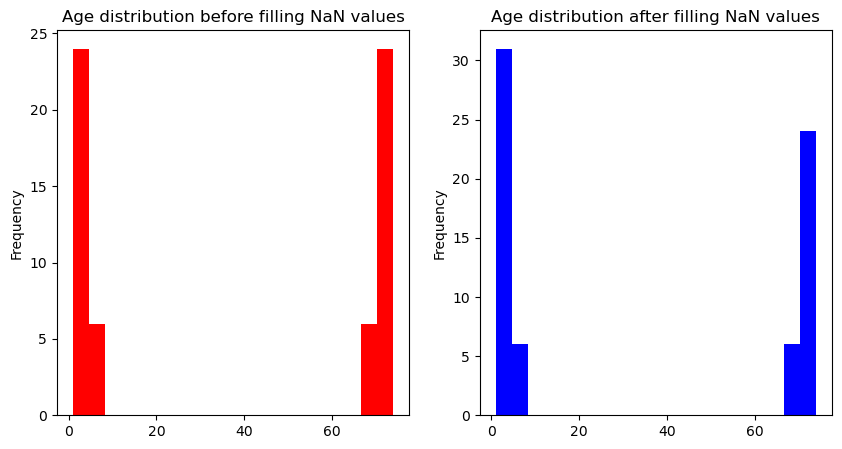

In [17]:
## Let's display the distribution of the age values before and after filling the NaN values
import matplotlib.pyplot as plt
axs = plt.subplots(1, 2, figsize=(10, 5))

example_age_df["Age"].plot.hist(ax=axs[1][0], bins=20, color="red", title="Age distribution before filling NaN values")
example_age_df["Age_f"].plot.hist(ax=axs[1][1], bins=20, color="blue", title="Age distribution after filling NaN values")
plt.show()

In [18]:
## Random imputation
age_dfs = titanic[["Age"]].copy()

all_ages = age_dfs["Age"].dropna().values
age_dfs["Age_f"] = age_dfs["Age"].apply(lambda x: 
                                                      np.random.choice(all_ages)
                                                      )
age_dfs.iloc[30:40]


,Age,Age_f
30,40.0,20.0
31,NaN,1.0
32,NaN,5.0
33,66.0,47.0
34,28.0,41.0
35,42.0,18.0
36,NaN,20.0
37,21.0,33.0
38,18.0,46.0
39,14.0,33.0


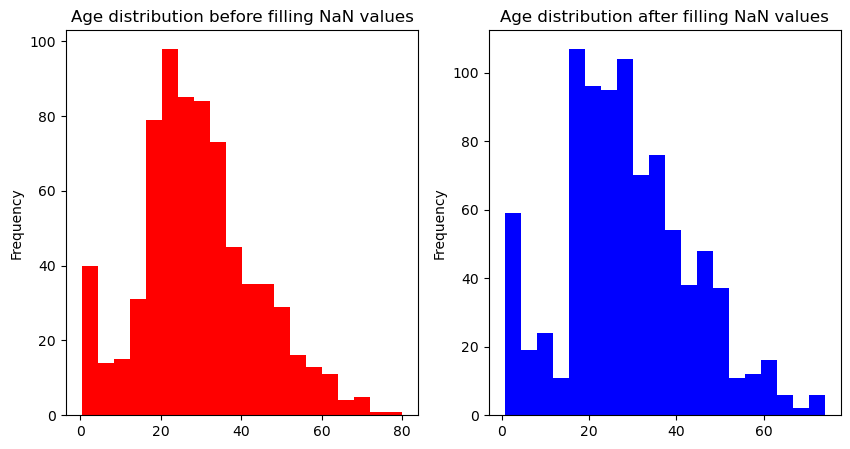

In [19]:
## Let's display the distribution of the age values before and after filling the NaN values
import matplotlib.pyplot as plt
axs = plt.subplots(1, 2, figsize=(10, 5))

age_dfs["Age"].plot.hist(ax=axs[1][0], bins=20, color="red", title="Age distribution before filling NaN values")
age_dfs["Age_f"].plot.hist(ax=axs[1][1], bins=20, color="blue", title="Age distribution after filling NaN values")
plt.show()

## Imputation gets more interesting on multi-variate tabular data:

In [20]:
age_dfs = {"Age" : [22, np.nan, 22, 23, np.nan, np.nan, 50, 50, 50, 61, 61, np.nan],
           "Name" : ["John", "John", "John", "Doe", "Doe", "Doe", "Jane", "Jane", "Jane", "Mary", "Mary", "Mary"],
           "Salary": [1000, 1200, 1000, 1500, 2000, 2000, 3000, 5000, 3000, 2000, 4000, 4000]
} 
age_dfs = pd.DataFrame(age_dfs)
age_dfs

,Age,Name,Salary
0,22.0,John,1000
1,NaN,John,1200
2,22.0,John,1000
3,23.0,Doe,1500
4,NaN,Doe,2000
5,NaN,Doe,2000
6,50.0,Jane,3000
7,50.0,Jane,5000
8,50.0,Jane,3000
9,61.0,Mary,2000


We can model missing values in a column by using information from the other columns in a dataset. More specifically, the column with missing values is the target variable, while the remaining columns could be used as predictor for the target variable. 

In our sample data frame, the Age column has missing values, and it is therefore assigned as the target variable in this scenario. This leaves the Name as our predictor variable. 


In [21]:
## First approach - manual conditioning on Name 
## fill nan using group by 
age_dfs["Age_f"] = age_dfs.groupby("Name")["Age"].transform(lambda x: x.fillna(x.mean()))
age_dfs

,Age,Name,Salary,Age_f
0,22.0,John,1000,22.0
1,NaN,John,1200,22.0
2,22.0,John,1000,22.0
3,23.0,Doe,1500,23.0
4,NaN,Doe,2000,23.0
5,NaN,Doe,2000,23.0
6,50.0,Jane,3000,50.0
7,50.0,Jane,5000,50.0
8,50.0,Jane,3000,50.0
9,61.0,Mary,2000,61.0


## What if we have more predictor columns?

In [22]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## K-Nearest Neighbors 

In the K-Nearest Neighbors imputation method we proceed to fill the missing value with the average of the nearest observations using all the dataframe.

An implementation is provided by sklearn: 

- [KNN Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)

The KNN Imputer is another multivariate imputation technique. KNN Imputer scans our dataframe for k nearest observations to the row with missing value. It will then proceed to fill the missing value with the average of those nearest observations. 

Here, I have set k to equal to 2 or in other words, I want KNN imputer to look for 2 observations that are nearest to fill the missing age with the *average age* of those 2 rows.

In [23]:
## knn imputer 
from sklearn.impute import KNNImputer

## first example on age_dfs
age_dfs = age_dfs[["Age", "Name", "Salary"]].copy()

## Important step : KNN Imputer requires all numerical or categorical values 
age_dfs["Name"] = age_dfs["Name"].astype("category").cat.codes

## Notice: you should normalize the data before applying KNN Imputer as euclidean distance is sensitive to the scale of the data

knn_imp = KNNImputer(n_neighbors = 2)
out_df = pd.DataFrame(knn_imp.fit_transform(age_dfs), columns = age_dfs.columns)
out_df

,Age,Name,Salary
0,22.0,2.0,1000.0
1,22.0,2.0,1200.0
2,22.0,2.0,1000.0
3,23.0,0.0,1500.0
4,42.0,0.0,2000.0
5,42.0,0.0,2000.0
6,50.0,1.0,3000.0
7,50.0,1.0,5000.0
8,50.0,1.0,3000.0
9,61.0,3.0,2000.0


In [24]:
columns = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

df = titanic[columns].copy()
## filter-out age < 18 
df = df[df["Age"] >= 18]

for c in ["Sex", "Embarked"]:
    ## convert non-numerical to categorical
    df[c] = df[c].astype("category").cat.codes

## KNN Imputer
knn_imp = KNNImputer(n_neighbors = 5)
out_df = pd.DataFrame(knn_imp.fit_transform(df), columns = df.columns)
out_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...
596,0.0,3.0,0.0,39.0,0.0,5.0,29.1250,1.0
597,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,2.0
598,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,2.0
599,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0


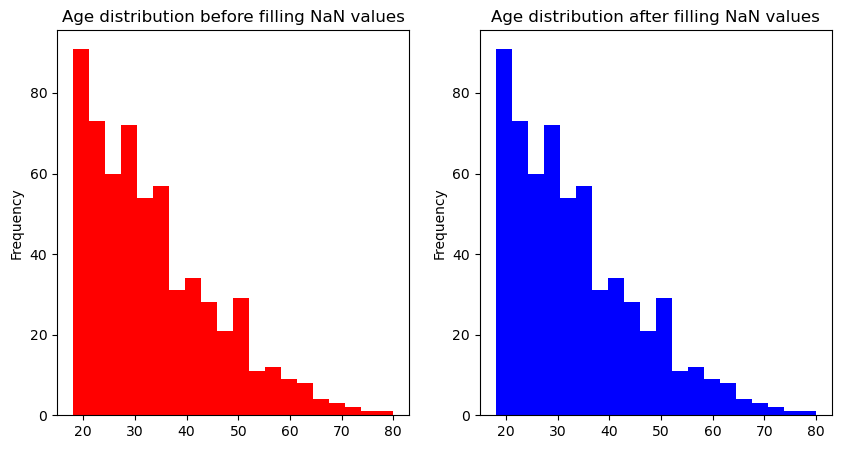

In [25]:
## Let's display the distribution of the age values before and after filling the NaN values
import matplotlib.pyplot as plt
axs = plt.subplots(1, 2, figsize=(10, 5))

titanic[titanic["Age"] >= 18]["Age"].plot.hist(ax=axs[1][0], bins=20, color="red", title="Age distribution before filling NaN values")
out_df["Age"].plot.hist(ax=axs[1][1], bins=20, color="blue", title="Age distribution after filling NaN values")
plt.show()

##  Time-Series Imputation

Notice that, pandas offers a wide ranges of operations to store and handle time-series:

* a datetime type, to track the time-series observation times
* resampling approaches to change time-series frequency
* rolling operations

### Imputation 
Filling missing values in time-series we can still use the following impute methods:

- Mean
- Median
- Most frequent (mode) 
- Last (forward fill): first preceding non-null value
- Next (back fill): next non-null value
- Last Next: mean of forward and back fill 
- KNN: mean of k nearest neighbors
- Zeroes

Lastly, we'll see how the impute methods performed for each series based on their mean absolute error (MAE). Key findings according to MAE:
- Mean of forward and back fill performs best for changing mean, random walk, and seasonal series.
- Back fill performs best for a changing variance series
- KNN performs best for a stationary series
- Mean and median aren't appropriate for changing mean and seasonal series, however they can be used for a stationary series
- Most frequent and zeroes performed poorly for all series

In general also Machine Learning and Deep Learning (i.e., generative models) can be used.


Credits: see references and [original code here](https://gist.github.com/hrishipoola/15c0e73feee72846b96e3d4400727bdb)


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns 
from numpy.random import normal, seed

In [27]:
## Let's create some time-series 
# Stationary
seed(232)
stationary = normal(loc=30000, scale=10000, size=132) # mean: 30000, st dev: 10000

# Changing Mean
seed(232)
t = np.arange(0,132)
changing_mean = (10000 * np.random.randn(132) + 0.0005*t**4) + 30000

# Changing variance
seed(232)
t = np.arange(0,132)
changing_variance = np.random.randn(132)*t*100 + 30000

# Random Walk
seed(232)
random_walk = np.empty(132)
for i in range(1,132):
    random_walk[i] = random_walk[i-1] + np.random.randn()    
random_walk = 2500 * random_walk + 30000

# Seasonal
season = np.concatenate([np.arange(0,12), np.arange(0,12), np.arange(0,12), np.arange(0,12),np.arange(0,12), np.arange(0,12),np.arange(0,12), np.arange(0,12), np.arange(0,12),np.arange(0,12), np.arange(0,12)])
seasonal = random_walk + 2200*season

Text(0.5, 1.0, 'Seasonal')

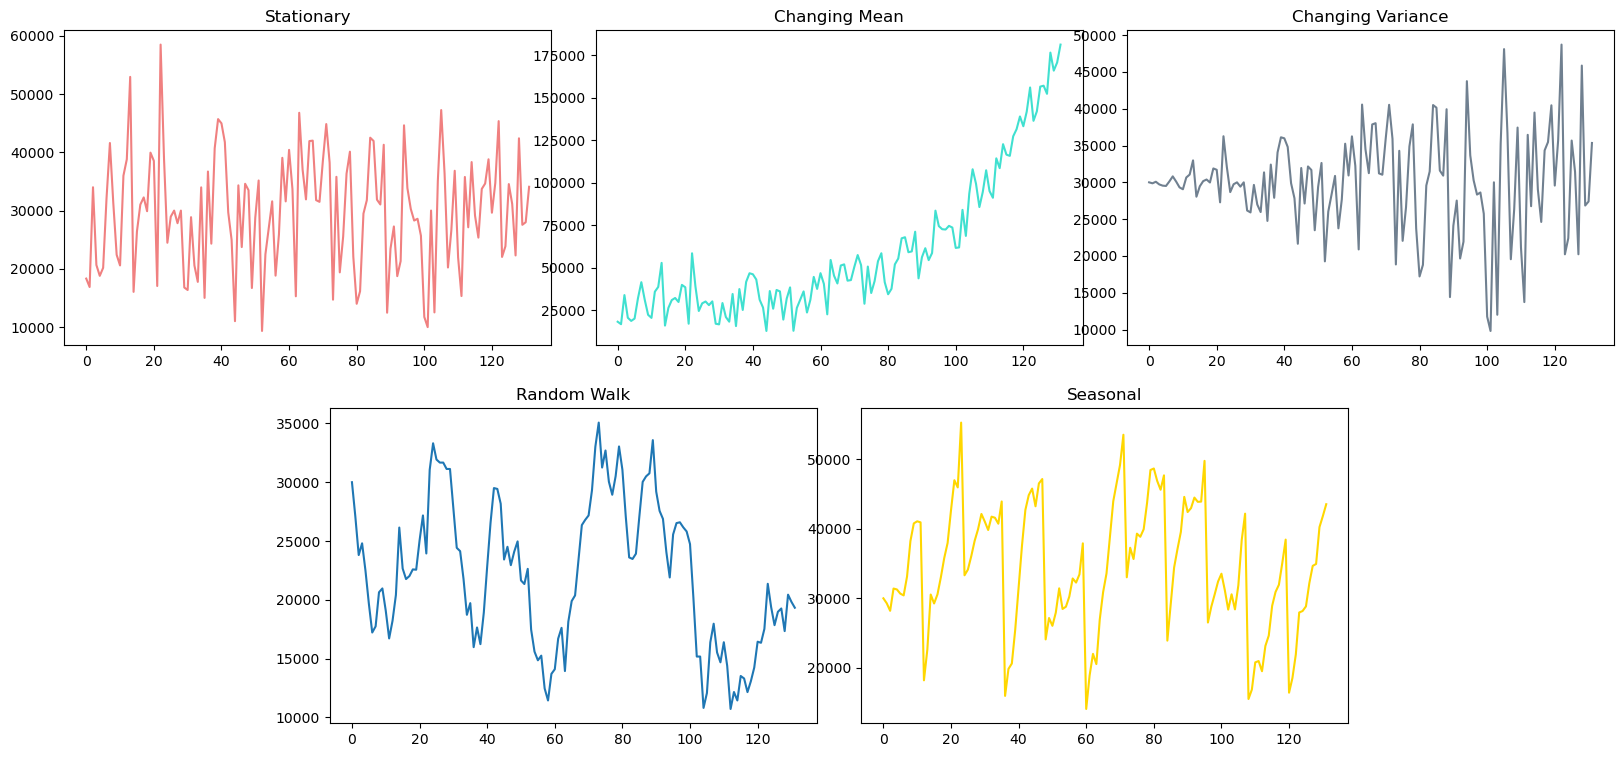

In [28]:
# Plot sales trends
plt.figure(figsize=(20,9))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

ax1.plot(stationary, color='lightcoral')
ax1.set_title('Stationary')

ax2.plot(changing_mean, color='turquoise')
ax2.set_title('Changing Mean')

ax3.plot(changing_variance, color='slategray')
ax3.set_title('Changing Variance')

ax4.plot(random_walk)
ax4.set_title('Random Walk')

ax5.plot(seasonal, color='gold')
ax5.set_title('Seasonal')

In [29]:
# Create dataframe
sales = pd.DataFrame(dict(date = pd.date_range(start='2010-1-1', periods=132, freq='M'),
                       stationary = stationary,
                       changing_mean = changing_mean,
                       changing_variance = changing_variance,
                       random_walk = random_walk,
                       seasonal = seasonal))

# Check last1 few rows
sales.tail()

,date,stationary,changing_mean,changing_variance,random_walk,seasonal
127,2020-08-31,22304.006890,152376.327390,20226.088750,19263.126522,34663.126522
128,2020-09-30,42394.062382,176611.790382,45864.399849,17339.128244,34939.128244
129,2020-10-31,27557.458854,166018.899354,26849.121922,20437.643840,40237.643840
130,2020-11-30,28002.006148,170807.006148,27402.607992,19827.008554,41827.008554
131,2020-12-31,34082.678076,181332.638576,35348.308280,19327.510090,43527.510090


[Text(0.5, 1.0, 'Monthly Sales'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Sales($)')]

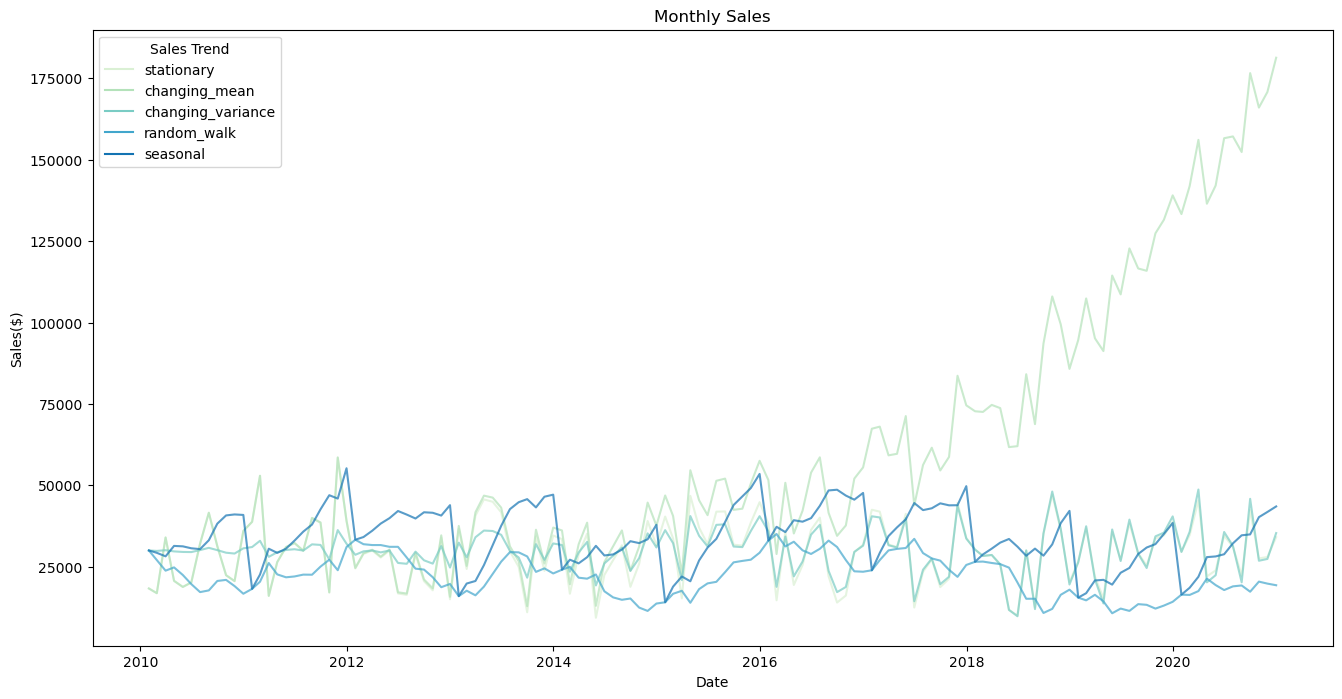

In [30]:
# Plot lines in one plot 

# Change from wide to long form with melt
sales_long = sales.melt(id_vars=['date'], var_name = 'Sales Trend', value_name='sales')

# Plot
fig, ax = plt.subplots(figsize=(16,8))

sns.lineplot(x='date', 
             y='sales', 
             data=sales_long, 
             hue='Sales Trend',
             palette='GnBu',
             alpha=0.7,
             ax=ax)

ax.set(title='Monthly Sales', xlabel='Date', ylabel='Sales($)')

In [31]:
# Create month and year variables
sales = sales.assign(year = lambda x: x['date'].dt.year, 
                     month = lambda x: x['date'].dt.month).set_index('date')

sales.head()

,stationary,changing_mean,changing_variance,random_walk,seasonal,year,month
date,,,,,,,
2010-01-31,18331.440670,18331.440670,30000.000000,30000.000000,30000.000000,2010,1
2010-02-28,16887.300179,16887.300679,29868.873002,27082.860167,29282.860167,2010,2
2010-03-31,34000.496100,34000.504100,30080.009922,23804.685212,28204.685212,2010,3
2010-04-30,20672.499458,20672.539958,29720.174984,24804.809237,31404.809237,2010,4
2010-05-31,18805.842931,18805.970931,29552.233717,22472.934102,31272.934102,2010,5


### Simulate missing-values 

Let's create a new variable sales_na that includes sales values with randomly removed values. To do that, we'll:

- Create a mask to tag missing and filled values (na_mask)
- Generate random missing values (15%) using the boolean mask to replace those index values with NaN



[Text(0.5, 1.0, 'Missing Values'),
 Text(0.5, 14.722222222222216, 'index'),
 Text(120.58159722222221, 0.5, 'variable')]

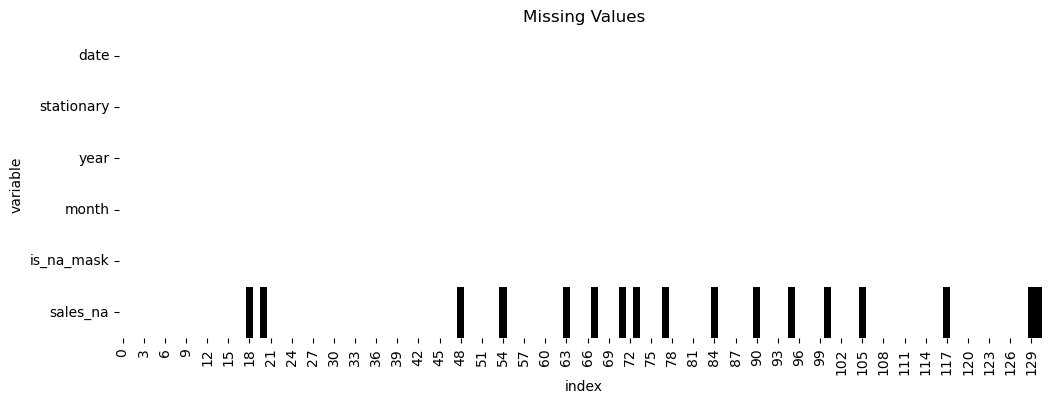

In [32]:
stationary = sales[['stationary', 'year','month']].reset_index()

# Generate missnig values (15%)
seed(232)
stationary['is_na_mask'] = np.random.binomial(n=1, p=0.15, size=stationary.shape[0]).astype('bool')*2000 #multiply by 2000 so lines visible in plot later
stationary = stationary.assign(sales_na = lambda x: np.where(x['is_na_mask'], np.nan, x['stationary'])) 

# Plot missing value index positions
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(data=stationary.isna().T, cmap='binary', cbar=False, ax=ax)
ax.set(title='Missing Values', xlabel='index', ylabel='variable')

## Stationary Process

In [33]:
stationary.tail()

,date,stationary,year,month,is_na_mask,sales_na
127,2020-08-31,22304.006890,2020,8,0,22304.006890
128,2020-09-30,42394.062382,2020,9,0,42394.062382
129,2020-10-31,27557.458854,2020,10,2000,NaN
130,2020-11-30,28002.006148,2020,11,2000,NaN
131,2020-12-31,34082.678076,2020,12,0,34082.678076


[Text(0.5, 1.0, 'Monthly Sales (with missing values)'),
 Text(0.5, 0, 'date'),
 Text(0, 0.5, 'Sales($)'),
 (0.0, 61391.62906240466)]

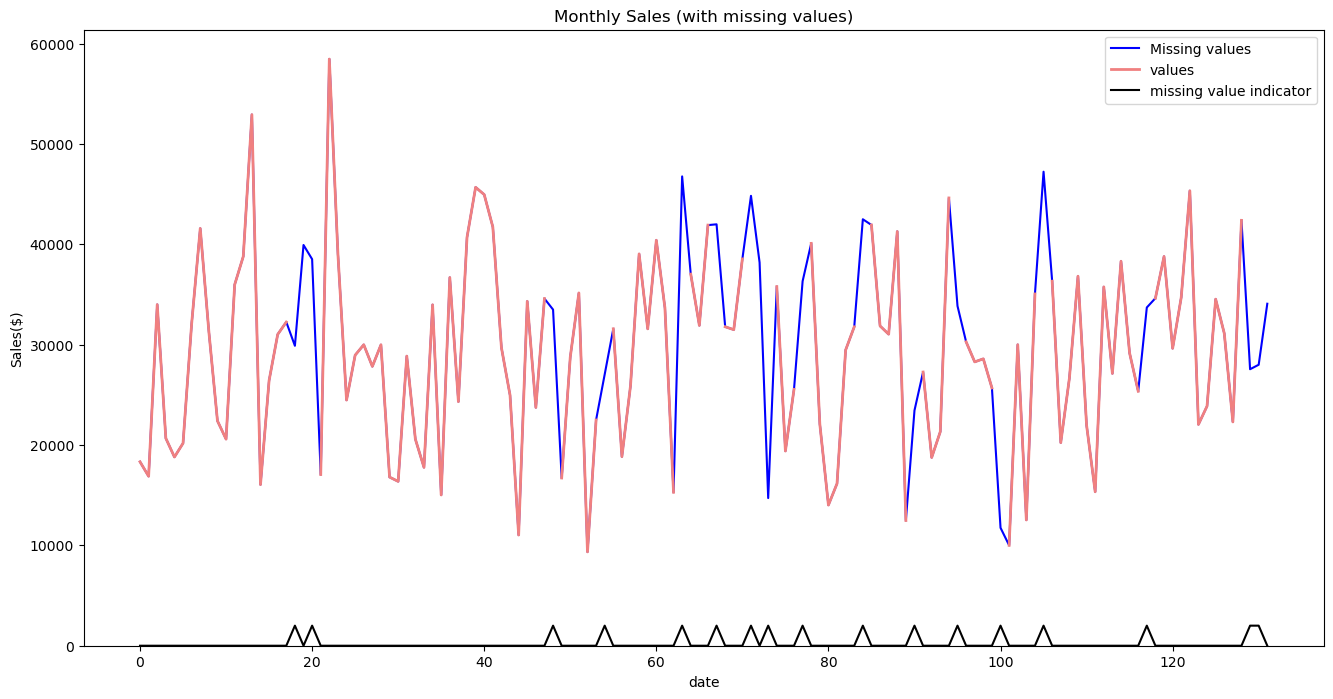

In [34]:
# Plot with missing values
fig, ax = plt.subplots(figsize=(16,8))
stationary["stationary"].plot(ax=ax, color='blue', label='Missing values')
stationary["sales_na"].plot(ax=ax, color='lightcoral', label='values', linewidth=2)
stationary["is_na_mask"].plot(ax=ax, color='black', label='missing value indicator')
plt.legend()
ax.set(title='Monthly Sales (with missing values)', xlabel='date', ylabel='Sales($)', ylim=(0, None))

Mean Squared Error: 1140.6058744335924


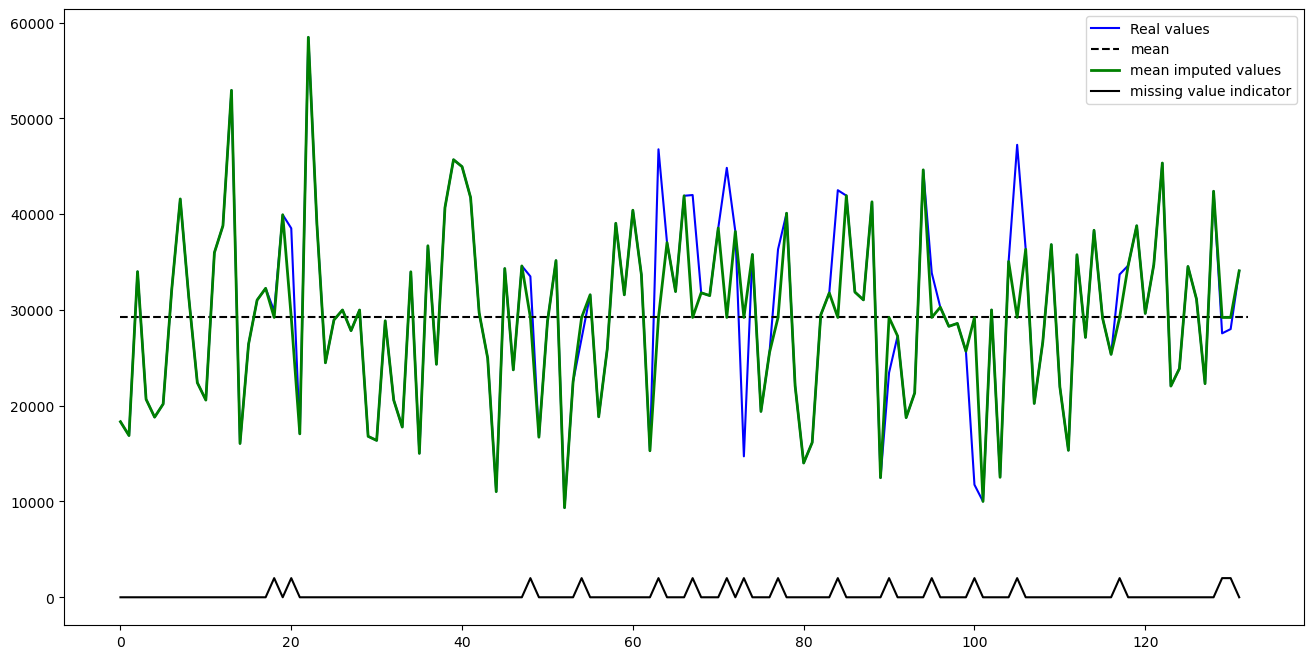

In [35]:
from sklearn.impute import SimpleImputer

## using the mean approach 
stationary["sales_na_mean"] = SimpleImputer(strategy='mean').fit_transform(stationary[['sales_na']])
## plot 
fig, ax = plt.subplots(figsize=(16,8))
stationary["stationary"].plot(ax=ax, color='blue', label='Real values')

## plot horizontal line for missing values
plt.hlines(y=stationary["sales_na"].mean(), xmin=0, xmax=stationary.shape[0], color='black', linestyle='--', label='mean')
stationary["sales_na_mean"].plot(ax=ax, color='green', label='mean imputed values', linewidth=2)
stationary["is_na_mask"].plot(ax=ax, color='black', label='missing value indicator')

## compute MSE 
mask = stationary["sales_na"].isna()
mse = np.mean(np.abs((mask*stationary["stationary"]) - (mask*stationary["sales_na_mean"])))
print(f'Mean Squared Error: {mse}')


plt.legend()

In [36]:
stationary.tail()

,date,stationary,year,month,is_na_mask,sales_na,sales_na_mean
127,2020-08-31,22304.006890,2020,8,0,22304.006890,22304.006890
128,2020-09-30,42394.062382,2020,9,0,42394.062382,42394.062382
129,2020-10-31,27557.458854,2020,10,2000,NaN,29214.925703
130,2020-11-30,28002.006148,2020,11,2000,NaN,29214.925703
131,2020-12-31,34082.678076,2020,12,0,34082.678076,34082.678076


In [37]:
# Imput missing values using different methods
stationary = stationary.assign(sales_na_mean = lambda x: SimpleImputer(strategy='mean').fit_transform(x[['sales_na']]),
                               
                               sales_na_median = lambda x: SimpleImputer(strategy='median').fit_transform(x[['sales_na']]),
                               
                               sales_na_most_frequent = lambda x: SimpleImputer(strategy='most_frequent').fit_transform(x[['sales_na']]),
                               
                               sales_na_last = lambda x: x['sales_na'].fillna(method='ffill'),
                               
                               sales_na_next = lambda x: x['sales_na'].fillna(method='bfill'),
                               
                               sales_na_last_next = lambda x: x[['sales_na_last', 'sales_na_next']].mean(axis=1),
                               
                               sales_na_knn = lambda x: KNNImputer(n_neighbors=3, weights='distance').fit_transform(x[['sales_na', 'month', 'year']])[:, 0],
                               
                               sales_na_zero = lambda x: SimpleImputer(fill_value=0.0, strategy='constant').fit_transform(x[['sales_na']])
                               )


Mean Squared Error: 1027.6660138716725


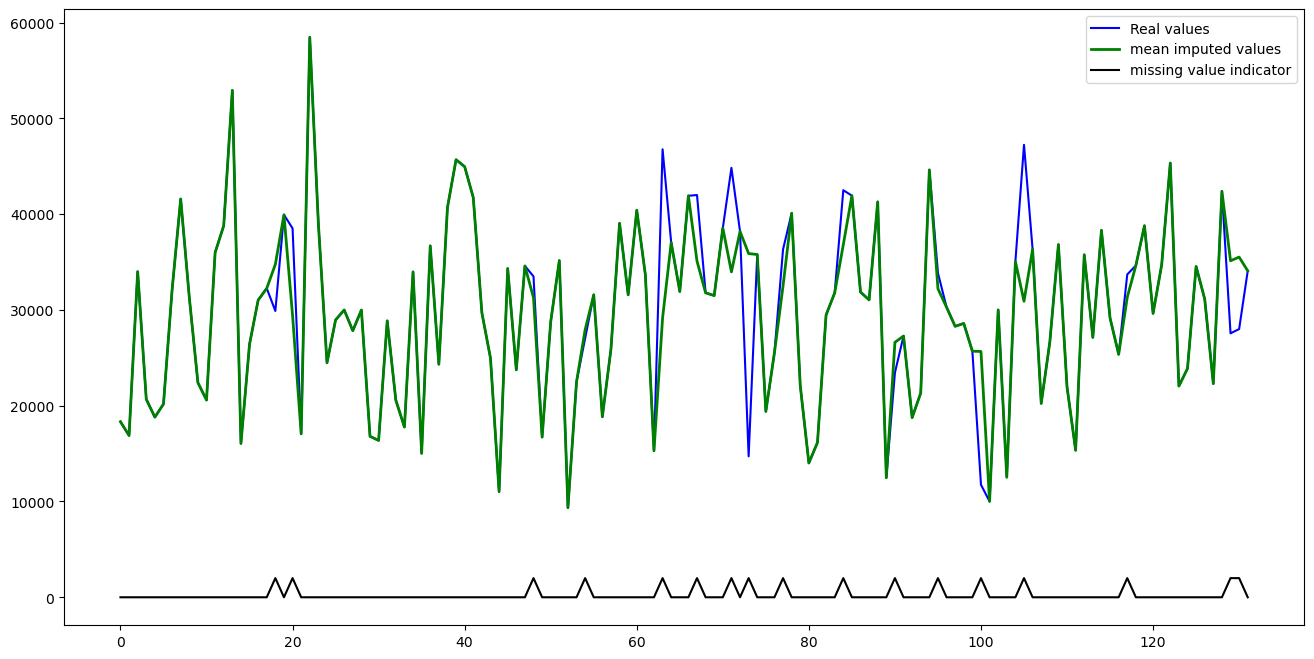

In [38]:
display_feature = "sales_na_knn"

from sklearn.impute import SimpleImputer

## plot 
fig, ax = plt.subplots(figsize=(16,8))
stationary["stationary"].plot(ax=ax, color='blue', label='Real values')

## plot horizontal line for missing values
stationary[display_feature].plot(ax=ax, color='green', label='mean imputed values', linewidth=2)
stationary["is_na_mask"].plot(ax=ax, color='black', label='missing value indicator')

## compute MSE 
mask = stationary["sales_na"].isna()
mse = np.mean(np.abs((mask*stationary["stationary"]) - (mask*stationary[display_feature])))
print(f'Mean Squared Error: {mse}')


plt.legend()

In [39]:
results_df = {"time-series" : [], "mse" : [], "approach" : []}
for fea in ["sales_na_mean",
    "sales_na_median",
    "sales_na_most_frequent",
    "sales_na_last",
    "sales_na_next",
    "sales_na_last_next",
    "sales_na_knn",
    "sales_na_zero",
    ]:

    mask = stationary["sales_na"].isna()
    mse = np.mean(np.abs((mask*stationary["stationary"]) - (mask*stationary[fea])))
    results_df["time-series"].append("stationary")
    results_df["mse"].append(mse)
    results_df["approach"].append(fea)

pd.DataFrame(results_df)

,time-series,mse,approach
0,stationary,1140.605874,sales_na_mean
1,stationary,1112.656958,sales_na_median
2,stationary,3050.867803,sales_na_most_frequent
3,stationary,1346.020414,sales_na_last
4,stationary,1048.659715,sales_na_next
5,stationary,1039.041004,sales_na_last_next
6,stationary,1027.666014,sales_na_knn
7,stationary,4255.123201,sales_na_zero


## What happen with different processes?

## Changing Mean

[Text(0.5, 1.0, 'Monthly Sales (with missing values)'),
 Text(0.5, 0, 'date'),
 Text(0, 0.5, 'Sales($)'),
 (0.0, 190399.27050507627)]

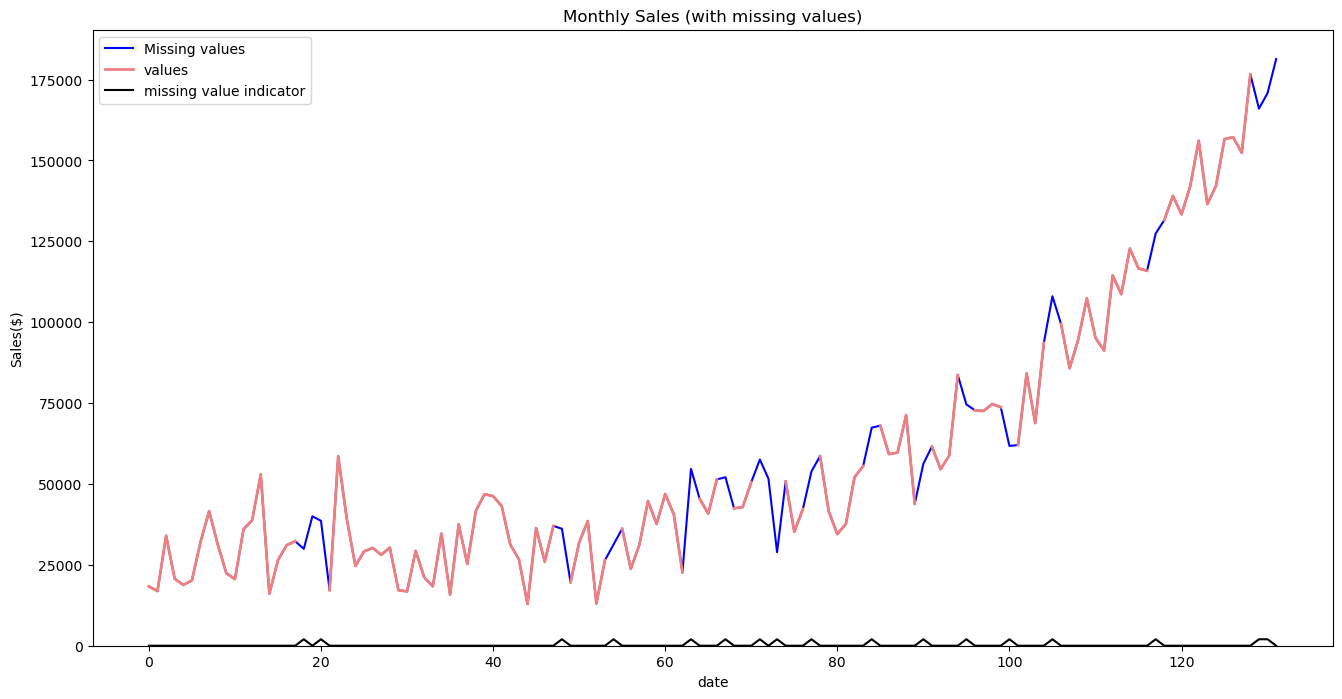

In [40]:
changing_mean = sales[['changing_mean', 'year','month']].reset_index()

# Generate missnig values (15%)
seed(232)
changing_mean['is_na_mask'] = np.random.binomial(n=1, p=0.15, size=changing_mean.shape[0]).astype('bool')*2000 #multiply by 2000 so lines visible in plot later
changing_mean = changing_mean.assign(sales_na = lambda x: np.where(x['is_na_mask'], np.nan, x['changing_mean'])) 

# Plot with missing values
# Plot with missing values
fig, ax = plt.subplots(figsize=(16,8))
changing_mean["changing_mean"].plot(ax=ax, color='blue', label='Missing values')
changing_mean["sales_na"].plot(ax=ax, color='lightcoral', label='values', linewidth=2)
changing_mean["is_na_mask"].plot(ax=ax, color='black', label='missing value indicator')
plt.legend()
ax.set(title='Monthly Sales (with missing values)', xlabel='date', ylabel='Sales($)', ylim=(0, None))

Mean Squared Error: 3862.155952296658


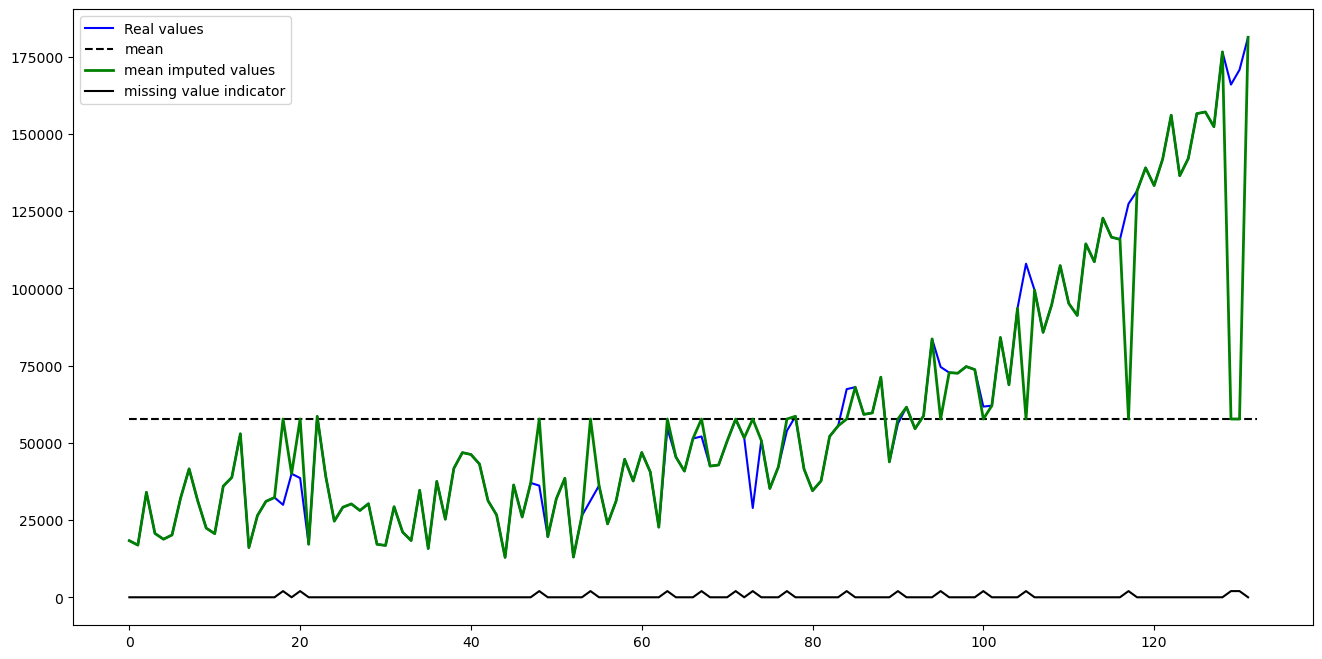

In [41]:
from sklearn.impute import SimpleImputer

## using the mean approach 
changing_mean["sales_na_mean"] = SimpleImputer(strategy='mean').fit_transform(changing_mean[['sales_na']])
## plot 
fig, ax = plt.subplots(figsize=(16,8))
changing_mean["changing_mean"].plot(ax=ax, color='blue', label='Real values')

## plot horizontal line for missing values
plt.hlines(y=changing_mean["sales_na"].mean(), xmin=0, xmax=changing_mean.shape[0], color='black', linestyle='--', label='mean')
changing_mean["sales_na_mean"].plot(ax=ax, color='green', label='mean imputed values', linewidth=2)
changing_mean["is_na_mask"].plot(ax=ax, color='black', label='missing value indicator')

## compute MSE 
mask = changing_mean["sales_na"].isna()
mse = np.mean(np.abs((mask*changing_mean["changing_mean"]) - (mask*changing_mean["sales_na_mean"])))
print(f'Mean Squared Error: {mse}')


plt.legend()

In [42]:
# Imput missing values using different methods
changing_mean = changing_mean.assign(sales_na_mean = lambda x: SimpleImputer(strategy='mean').fit_transform(x[['sales_na']]),
                               
                               sales_na_median = lambda x: SimpleImputer(strategy='median').fit_transform(x[['sales_na']]),
                               
                               sales_na_most_frequent = lambda x: SimpleImputer(strategy='most_frequent').fit_transform(x[['sales_na']]),
                               
                               sales_na_last = lambda x: x['sales_na'].fillna(method='ffill'),
                               
                               sales_na_next = lambda x: x['sales_na'].fillna(method='bfill'),
                               
                               sales_na_last_next = lambda x: x[['sales_na_last', 'sales_na_next']].mean(axis=1),
                               
                               sales_na_knn = lambda x: KNNImputer(n_neighbors=3, weights='distance').fit_transform(x[['sales_na', 'month', 'year']])[:, 0],
                               
                               sales_na_zero = lambda x: SimpleImputer(fill_value=0.0, strategy='constant').fit_transform(x[['sales_na']])
                               )


In [43]:
for fea in ["sales_na_mean",
    "sales_na_median",
    "sales_na_most_frequent",
    "sales_na_last",
    "sales_na_next",
    "sales_na_last_next",
    "sales_na_knn",
    "sales_na_zero",
    ]:

    mask = changing_mean["sales_na"].isna()
    mse = np.mean(np.abs((mask*changing_mean["changing_mean"]) - (mask*changing_mean[fea])))
    results_df["time-series"].append("changing_mean")
    results_df["mse"].append(mse)
    results_df["approach"].append(fea)

pd.DataFrame(results_df)

,time-series,mse,approach
0,stationary,1140.605874,sales_na_mean
1,stationary,1112.656958,sales_na_median
2,stationary,3050.867803,sales_na_most_frequent
3,stationary,1346.020414,sales_na_last
4,stationary,1048.659715,sales_na_next
5,stationary,1039.041004,sales_na_last_next
6,stationary,1027.666014,sales_na_knn
7,stationary,4255.123201,sales_na_zero
8,changing_mean,3862.155952,sales_na_mean
9,changing_mean,4468.762391,sales_na_median


## Changing Variance 

[Text(0.5, 1.0, 'Monthly Sales (with missing values)'),
 Text(0.5, 0, 'date'),
 Text(0, 0.5, 'Sales($)'),
 (0.0, 51151.08300524732)]

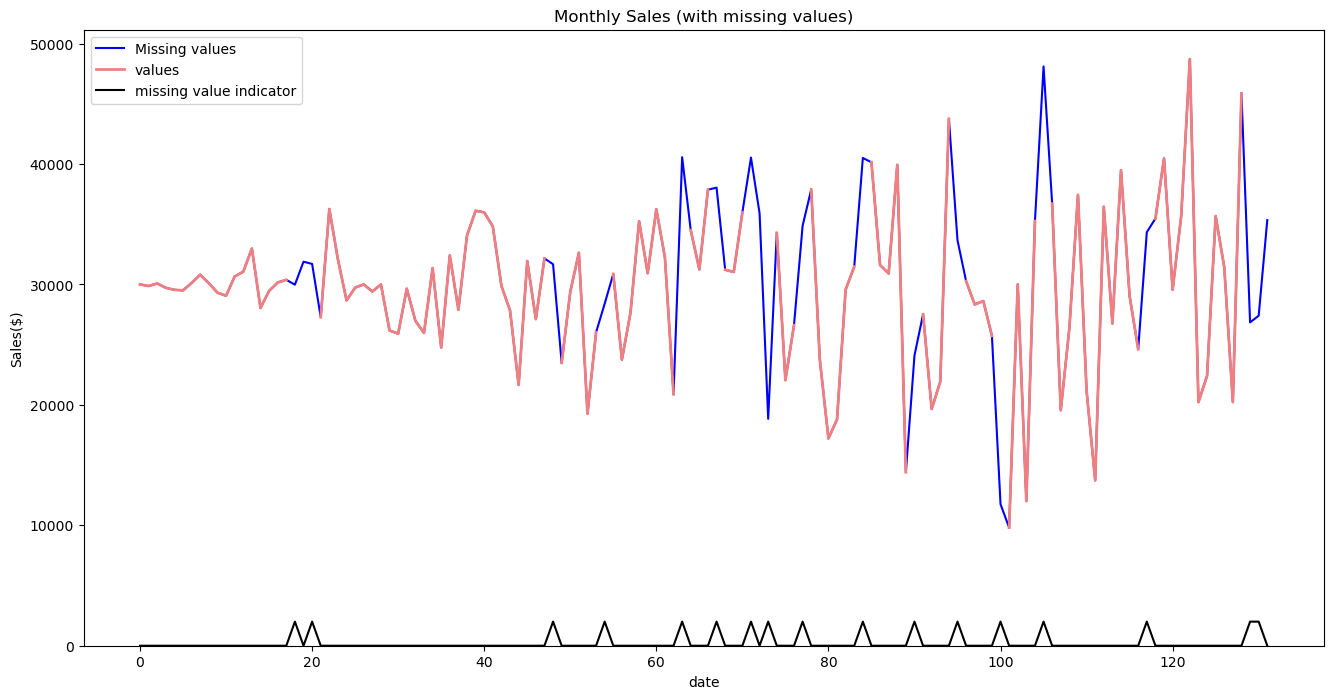

In [44]:
changing_variance = sales[['changing_variance', 'year','month']].reset_index()

# Generate missnig values (15%)
seed(232)
changing_variance['is_na_mask'] = np.random.binomial(n=1, p=0.15, size=changing_variance.shape[0]).astype('bool')*2000 #multiply by 2000 so lines visible in plot later
changing_variance = changing_variance.assign(sales_na = lambda x: np.where(x['is_na_mask'], np.nan, x['changing_variance'])) 

# Plot missing value index positions

fig, ax = plt.subplots(figsize=(16,8))
changing_variance["changing_variance"].plot(ax=ax, color='blue', label='Missing values')
changing_variance["sales_na"].plot(ax=ax, color='lightcoral', label='values', linewidth=2)
changing_variance["is_na_mask"].plot(ax=ax, color='black', label='missing value indicator')
plt.legend()
ax.set(title='Monthly Sales (with missing values)', xlabel='date', ylabel='Sales($)', ylim=(0, None))

In [45]:
# Imput missing values using different methods
changing_variance = changing_variance.assign(sales_na_mean = lambda x: SimpleImputer(strategy='mean').fit_transform(x[['sales_na']]),
                               
                               sales_na_median = lambda x: SimpleImputer(strategy='median').fit_transform(x[['sales_na']]),
                               
                               sales_na_most_frequent = lambda x: SimpleImputer(strategy='most_frequent').fit_transform(x[['sales_na']]),
                               
                               sales_na_last = lambda x: x['sales_na'].fillna(method='ffill'),
                               
                               sales_na_next = lambda x: x['sales_na'].fillna(method='bfill'),
                               
                               sales_na_last_next = lambda x: x[['sales_na_last', 'sales_na_next']].mean(axis=1),
                               
                               sales_na_knn = lambda x: KNNImputer(n_neighbors=3, weights='distance').fit_transform(x[['sales_na', 'month', 'year']])[:, 0],
                               
                               sales_na_zero = lambda x: SimpleImputer(fill_value=0.0, strategy='constant').fit_transform(x[['sales_na']])
                               )


Mean Squared Error: 1181.6974926503035


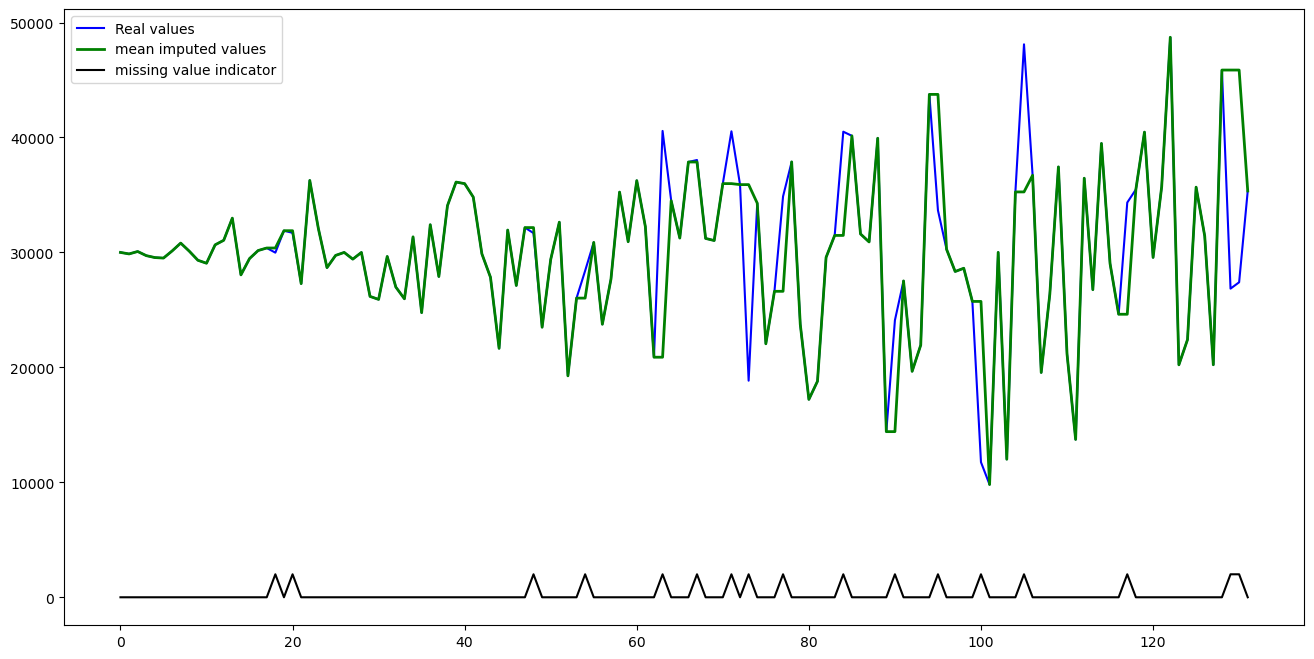

In [46]:
display_feature = "sales_na_last"

from sklearn.impute import SimpleImputer

## plot 
fig, ax = plt.subplots(figsize=(16,8))
changing_variance["changing_variance"].plot(ax=ax, color='blue', label='Real values')

## plot horizontal line for missing values
changing_variance[display_feature].plot(ax=ax, color='green', label='mean imputed values', linewidth=2)
changing_variance["is_na_mask"].plot(ax=ax, color='black', label='missing value indicator')

## compute MSE 
mask = changing_variance["sales_na"].isna()
mse = np.mean(np.abs((mask*changing_variance["changing_variance"]) - (mask*changing_variance[display_feature])))
print(f'Mean Squared Error: {mse}')


plt.legend()

In [47]:
for fea in ["sales_na_mean",
    "sales_na_median",
    "sales_na_most_frequent",
    "sales_na_last",
    "sales_na_next",
    "sales_na_last_next",
    "sales_na_knn",
    "sales_na_zero",
    ]:

    mask = changing_variance["sales_na"].isna()
    mse = np.mean(np.abs((mask*changing_variance["changing_variance"]) - (mask*changing_variance[fea])))
    results_df["time-series"].append("changing_variance")
    results_df["mse"].append(mse)
    results_df["approach"].append(fea)

pd.DataFrame(results_df)

,time-series,mse,approach
0,stationary,1140.605874,sales_na_mean
1,stationary,1112.656958,sales_na_median
2,stationary,3050.867803,sales_na_most_frequent
3,stationary,1346.020414,sales_na_last
4,stationary,1048.659715,sales_na_next
5,stationary,1039.041004,sales_na_last_next
6,stationary,1027.666014,sales_na_knn
7,stationary,4255.123201,sales_na_zero
8,changing_mean,3862.155952,sales_na_mean
9,changing_mean,4468.762391,sales_na_median


## Periodic time-series

[Text(0.5, 1.0, 'Monthly Sales (with missing values)'),
 Text(0.5, 0, 'date'),
 Text(0, 0.5, 'Sales($)'),
 (0.0, 58019.45272595858)]

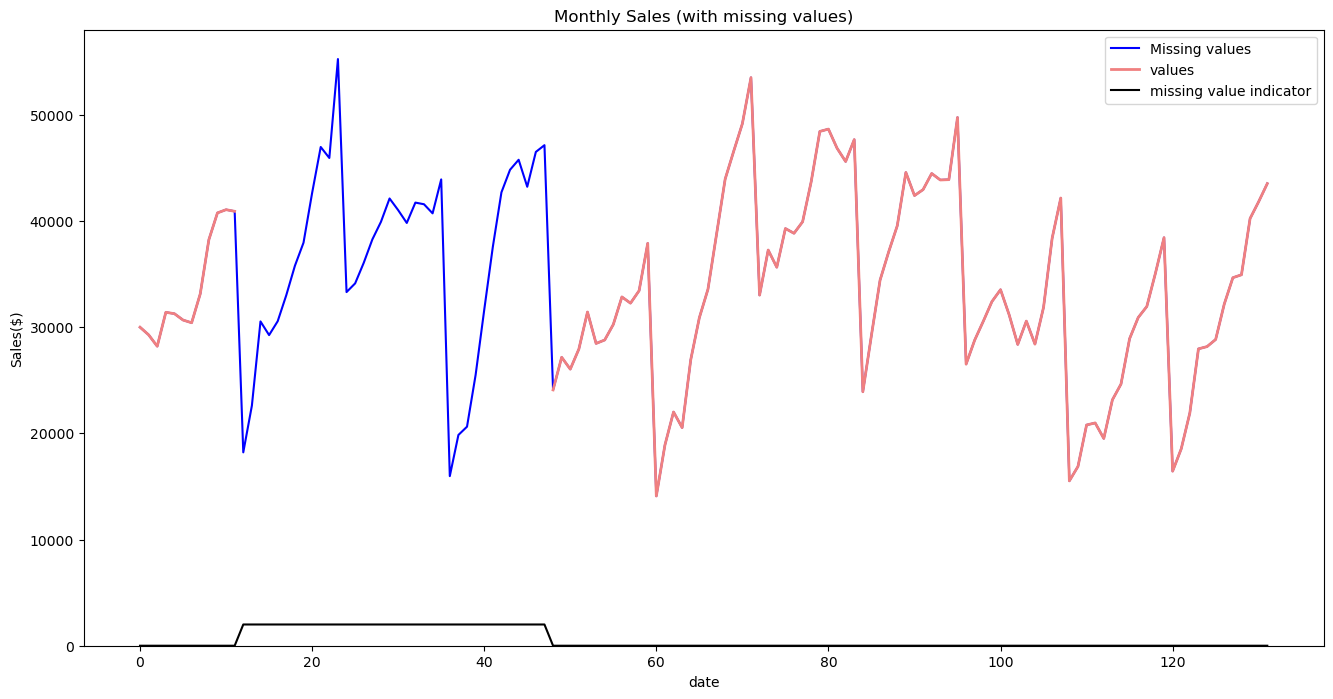

In [48]:
seasonal = sales[['seasonal', 'year','month']].reset_index()

seed(232)
## drop few entire years
seasonal['is_na_mask'] = seasonal["year"].isin([2011, 2012, 2013]) * 2000
seasonal = seasonal.assign(sales_na = lambda x: np.where(x['is_na_mask'], np.nan, x['seasonal'])) 

# Plot missing value index positions
fig, ax = plt.subplots(figsize=(16,8))
seasonal["seasonal"].plot(ax=ax, color='blue', label='Missing values')
seasonal["sales_na"].plot(ax=ax, color='lightcoral', label='values', linewidth=2)
seasonal["is_na_mask"].plot(ax=ax, color='black', label='missing value indicator')
plt.legend()
ax.set(title='Monthly Sales (with missing values)', xlabel='date', ylabel='Sales($)', ylim=(0, None))

In [49]:
# Imput missing values using different methods
seasonal = seasonal.assign(sales_na_mean = lambda x: SimpleImputer(strategy='mean').fit_transform(x[['sales_na']]),
                               
                               sales_na_median = lambda x: SimpleImputer(strategy='median').fit_transform(x[['sales_na']]),
                               
                               sales_na_most_frequent = lambda x: SimpleImputer(strategy='most_frequent').fit_transform(x[['sales_na']]),
                               
                               sales_na_last = lambda x: x['sales_na'].fillna(method='ffill'),
                               
                               sales_na_next = lambda x: x['sales_na'].fillna(method='bfill'),
                               
                               sales_na_last_next = lambda x: x[['sales_na_last', 'sales_na_next']].mean(axis=1),
                               
                               sales_na_knn = lambda x: KNNImputer(n_neighbors=3, weights='distance').fit_transform(x[['sales_na', 'month', 'year']])[:, 0],
                               sales_na_knn_month = lambda x: KNNImputer(n_neighbors=4, weights='distance').fit_transform(x[['sales_na', 'month']])[:, 0],
                               
                               sales_na_zero = lambda x: SimpleImputer(fill_value=0.0, strategy='constant').fit_transform(x[['sales_na']])
                               )


Mean Squared Error: 2011.557729843906


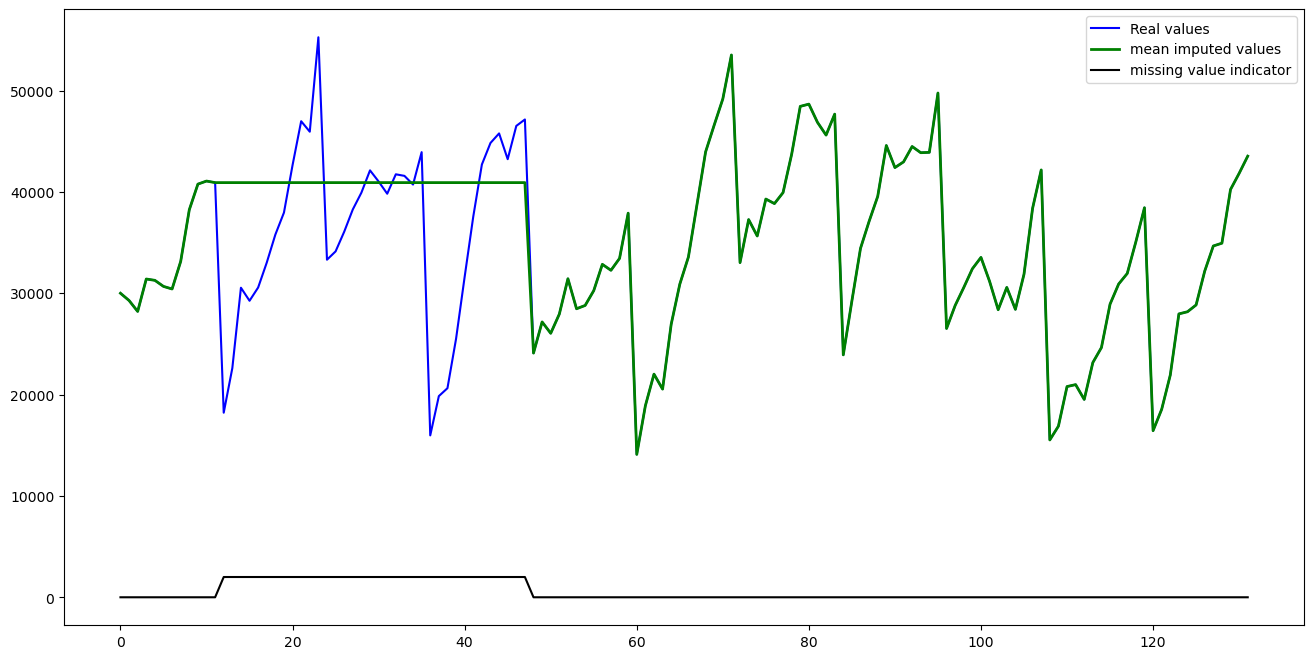

In [50]:
display_feature = "sales_na_last"

## plot 
fig, ax = plt.subplots(figsize=(16,8))
seasonal["seasonal"].plot(ax=ax, color='blue', label='Real values')

## plot horizontal line for missing values
seasonal[display_feature].plot(ax=ax, color='green', label='mean imputed values', linewidth=2)
seasonal["is_na_mask"].plot(ax=ax, color='black', label='missing value indicator')

## compute MSE 
mask = seasonal["sales_na"].isna()
mse = np.mean(np.abs((mask*seasonal["seasonal"]) - (mask*seasonal[display_feature])))
print(f'Mean Squared Error: {mse}')


plt.legend()

Mean Squared Error: 1204.0631261334893


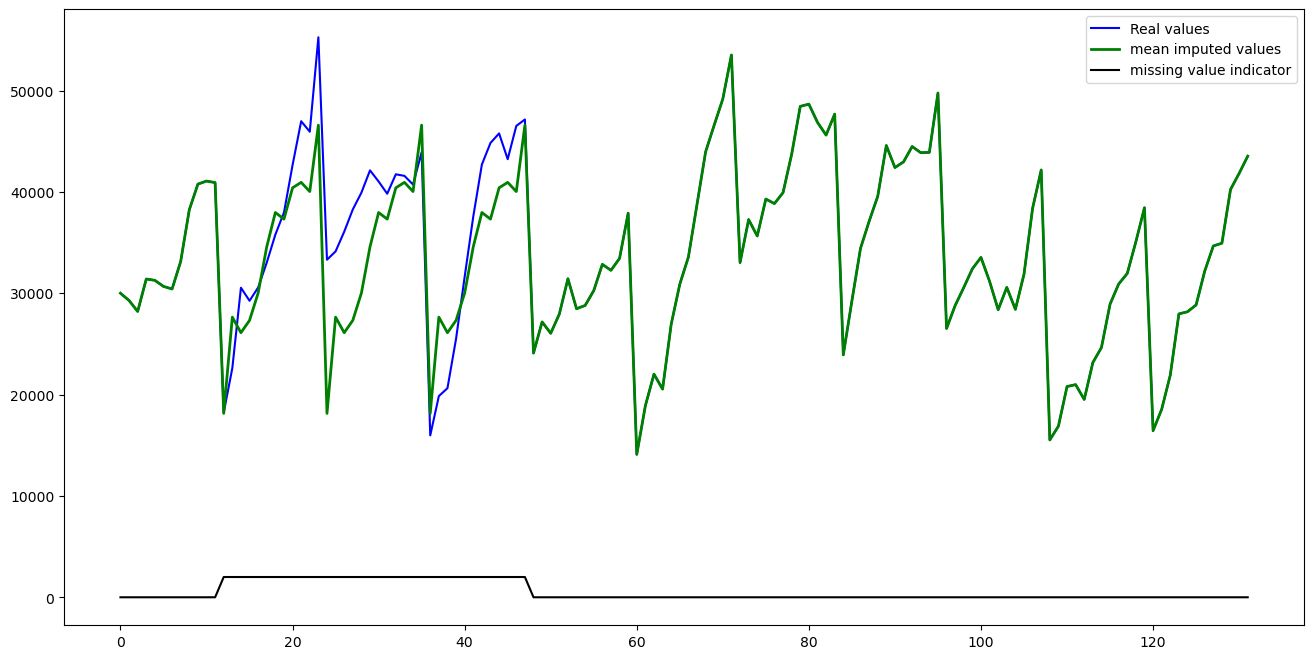

In [51]:
display_feature = "sales_na_knn_month"

## plot 
fig, ax = plt.subplots(figsize=(16,8))
seasonal["seasonal"].plot(ax=ax, color='blue', label='Real values')

## plot horizontal line for missing values
seasonal[display_feature].plot(ax=ax, color='green', label='mean imputed values', linewidth=2)
seasonal["is_na_mask"].plot(ax=ax, color='black', label='missing value indicator')

## compute MSE 
mask = seasonal["sales_na"].isna()
mse = np.mean(np.abs((mask*seasonal["seasonal"]) - (mask*seasonal[display_feature])))
print(f'Mean Squared Error: {mse}')


plt.legend()

In [52]:
results_df = {"time-series" : [], "mse" : [], "approach" : []}
for fea in ["sales_na_mean",
    "sales_na_median",
    "sales_na_most_frequent",
    "sales_na_last",
    "sales_na_next",
    "sales_na_last_next",
    "sales_na_knn",
    "sales_na_knn_month",
    "sales_na_zero",
    ]:

    mask = seasonal["sales_na"].isna()
    mse = np.mean(np.abs((mask*seasonal["seasonal"]) - (mask*seasonal[fea])))
    results_df["time-series"].append("seasonal")
    results_df["mse"].append(mse)
    results_df["approach"].append(fea)

pd.DataFrame(results_df)

,time-series,mse,approach
0,seasonal,2271.913659,sales_na_mean
1,seasonal,2406.395287,sales_na_median
2,seasonal,6176.223710,sales_na_most_frequent
3,seasonal,2011.557730,sales_na_last
4,seasonal,3801.016901,sales_na_next
5,seasonal,2371.936012,sales_na_last_next
6,seasonal,1914.148856,sales_na_knn
7,seasonal,1204.063126,sales_na_knn_month
8,seasonal,10020.768453,sales_na_zero


### Random walk 

[Text(0.5, 1.0, 'Monthly Sales (with missing values)'),
 Text(0.5, 0, 'date'),
 Text(0, 0.5, 'Sales($)'),
 (0.0, 36821.90255277254)]

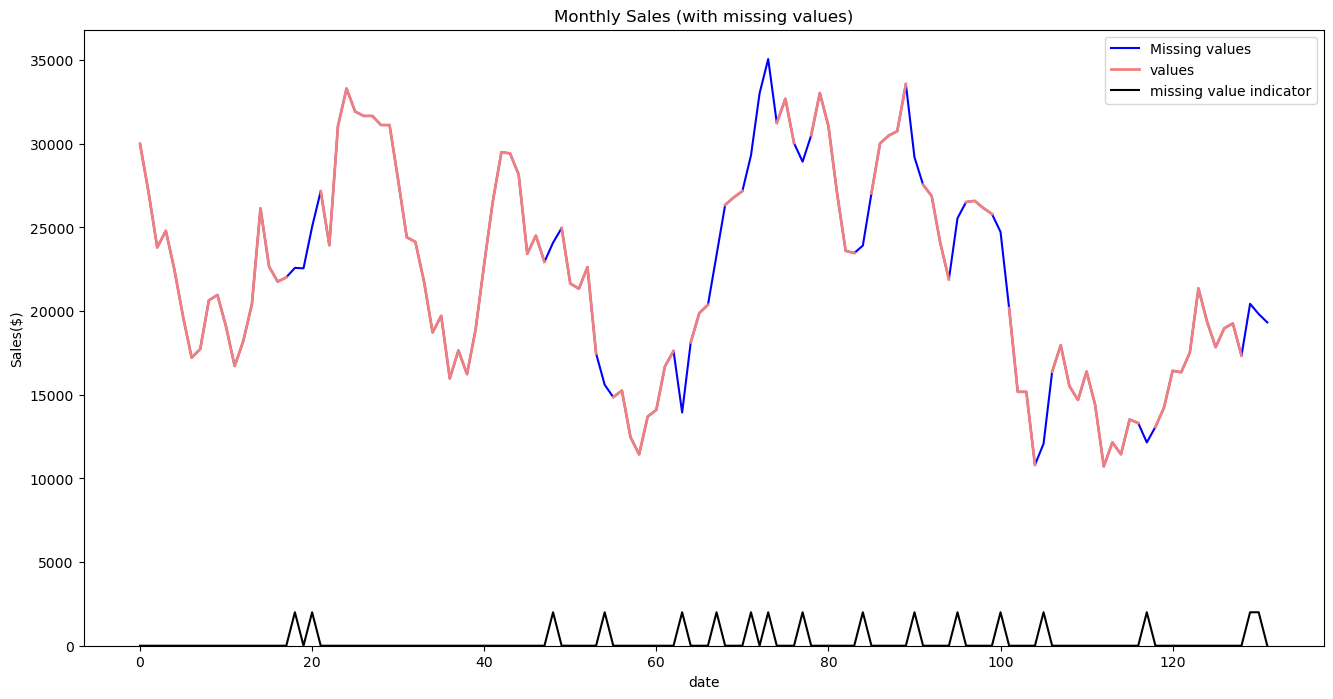

In [53]:
random_walk = sales[['random_walk', 'year','month']].reset_index()

# Generate missnig values (15%)
seed(232)
random_walk['is_na_mask'] = np.random.binomial(n=1, p=0.15, size=random_walk.shape[0]).astype('bool')*2000 #multiply by 2000 so lines visible in plot later
random_walk = random_walk.assign(sales_na = lambda x: np.where(x['is_na_mask'], np.nan, x['random_walk'])) 

# Plot missing value index positions

fig, ax = plt.subplots(figsize=(16,8))
random_walk["random_walk"].plot(ax=ax, color='blue', label='Missing values')
random_walk["sales_na"].plot(ax=ax, color='lightcoral', label='values', linewidth=2)
random_walk["is_na_mask"].plot(ax=ax, color='black', label='missing value indicator')
plt.legend()
ax.set(title='Monthly Sales (with missing values)', xlabel='date', ylabel='Sales($)', ylim=(0, None))

In [54]:
## Compare all methods: 

## Multi-variate time-series 

In [55]:
googl = pd.read_csv("https://raw.githubusercontent.com/jsyoon0823/TimeGAN/master/data/stock_data.csv", sep=",")

In [56]:
googl

,Open,High,Low,Close,Adj_Close,Volume
0,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,52.140873,53.651051,51.604362,52.657513,52.657513,9257400
...,...,...,...,...,...,...
3680,1207.479980,1216.300049,1200.500000,1205.920044,1205.920044,1017800
3681,1205.939941,1215.670044,1204.130005,1215.000000,1215.000000,950000
3682,1214.989990,1216.219971,1205.030029,1207.150024,1207.150024,907200
3683,1207.890015,1208.689941,1199.859985,1203.839966,1203.839966,860200


<Axes: >

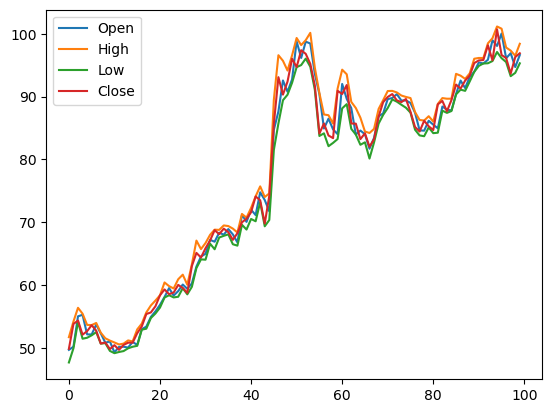

In [57]:
googl[["Open", "High", "Low","Close"]][:100].plot()

<Axes: >

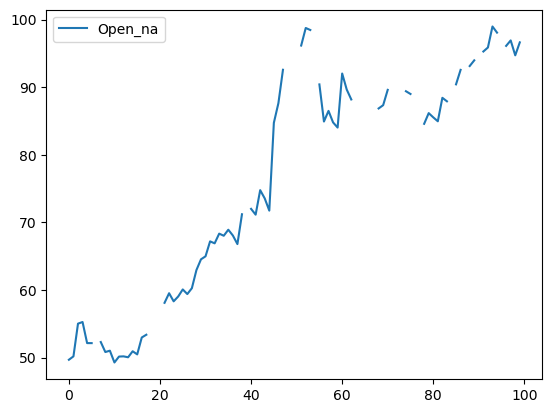

In [58]:
### sample missing value on Open 

# Generate missnig values (25%)
seed(232)
googl['is_na_mask'] = np.random.binomial(n=1, p=0.25, size=googl.shape[0]).astype('bool')*2000 #multiply by 2000 so lines visible in plot later
googl = googl.assign(Open_na = lambda x: np.where(x['is_na_mask'], np.nan, x['Open'])) 

googl[["Open_na"]][:100].plot() 

## Q1 - reconstruct the first 100 Steps of Open using your preferred approach

In [59]:
## code 

# Q2 : reconstruct the volume feature using your preferred approach

<Axes: >

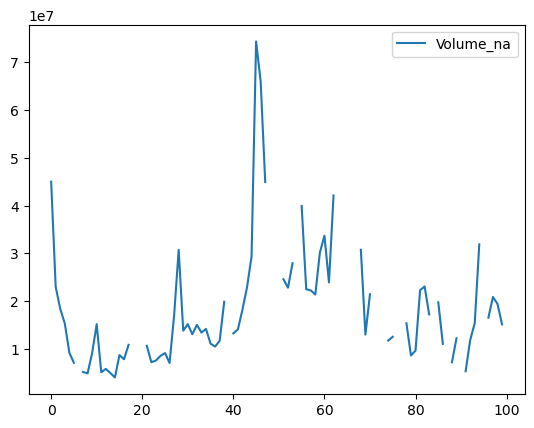

In [60]:
### sample missing value on Open 

# Generate missnig values (25%)
seed(232)
googl['is_na_mask'] = np.random.binomial(n=1, p=0.25, size=googl.shape[0]).astype('bool')*2000 #multiply by 2000 so lines visible in plot later
googl = googl.assign(Volume_na = lambda x: np.where(x['is_na_mask'], np.nan, x['Volume'])) 

googl[["Volume_na"]][:100].plot() 

## Q3: For titanic Age (univariate data) design an algorithm to impute by sampling the top N most frequent values